In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

df=pd.read_csv('/content/Vitamind.csv')
df.head()

,ID,DIET,Exposure,Log Time,Breathing Frequency,Tidal volume,Inspiratory Time,Expiratory Time,Penh,Age,Time of Experiment
0,186,ND,Smog,0:00:00.2,666.666667,0.008245,0.036,0.054,0.220027,8 weeks,1st Buxco
1,186,ND,Smog,0:00:00.4,508.474576,0.007422,0.034,0.084,0.301405,8 weeks,1st Buxco
2,186,ND,Smog,0:00:00.5,697.674419,0.008343,0.034,0.052,0.060990,8 weeks,1st Buxco
3,186,ND,Smog,0:00:00.8,789.473684,0.009542,0.034,0.042,0.066129,8 weeks,1st Buxco
4,186,ND,Smog,0:00:01.0,681.818182,0.010990,0.040,0.048,0.074712,8 weeks,1st Buxco


In [ ]:
df.drop('Log Time', axis=1, inplace=True)




In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.shape

(646759, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646759 entries, 0 to 646758
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DIET                 646759 non-null  object 
 1   Exposure             625841 non-null  object 
 2   Breathing Frequency  646759 non-null  float64
 3   Tidal volume         646759 non-null  float64
 4   Inspiratory Time     646759 non-null  float64
 5   Expiratory Time      646759 non-null  float64
 6   Penh                 646759 non-null  float64
 7   Age                  646759 non-null  object 
 8   Time of Experiment   646759 non-null  object 
dtypes: float64(5), object(4)
memory usage: 44.4+ MB


In [ ]:
df.describe()

,Breathing Frequency,Tidal volume,Inspiratory Time,Expiratory Time,Penh
count,646759.000000,646759.000000,646759.000000,646759.000000,646759.000000
mean,459.940332,0.024090,0.059197,0.079008,1.151103
std,113.768734,0.008691,0.014474,0.027758,0.815384
min,6.271547,0.003032,0.020000,0.020000,0.000000
25%,379.746835,0.017414,0.048000,0.064000,0.554216
50%,428.571429,0.024130,0.060000,0.078000,0.995822
75%,526.315790,0.030023,0.070000,0.088000,1.558440
max,1304.347826,0.160295,0.940658,9.175017,17.256006


In [ ]:
df.isnull().sum()

DIET                       0
Exposure               20918
Breathing Frequency        0
Tidal volume               0
Inspiratory Time           0
Expiratory Time            0
Penh                       0
Age                        0
Time of Experiment         0
dtype: int64

In [ ]:
## Handling misisng values

df['Exposure'].fillna(df['Exposure'].mode(), inplace = True)

In [ ]:
df.isnull().sum()

DIET                       0
Exposure               20918
Breathing Frequency        0
Tidal volume               0
Inspiratory Time           0
Expiratory Time            0
Penh                       0
Age                        0
Time of Experiment         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler


le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(df):

        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

df = dummyEncode(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646759 entries, 0 to 646758
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DIET                 646759 non-null  int64  
 1   Exposure             646759 non-null  int64  
 2   Breathing Frequency  646759 non-null  float64
 3   Tidal volume         646759 non-null  float64
 4   Inspiratory Time     646759 non-null  float64
 5   Expiratory Time      646759 non-null  float64
 6   Penh                 646759 non-null  float64
 7   Age                  646759 non-null  int64  
 8   Time of Experiment   646759 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 44.4 MB


In [ ]:
df.isnull().sum()

DIET                   0
Exposure               0
Breathing Frequency    0
Tidal volume           0
Inspiratory Time       0
Expiratory Time        0
Penh                   0
Age                    0
Time of Experiment     0
dtype: int64

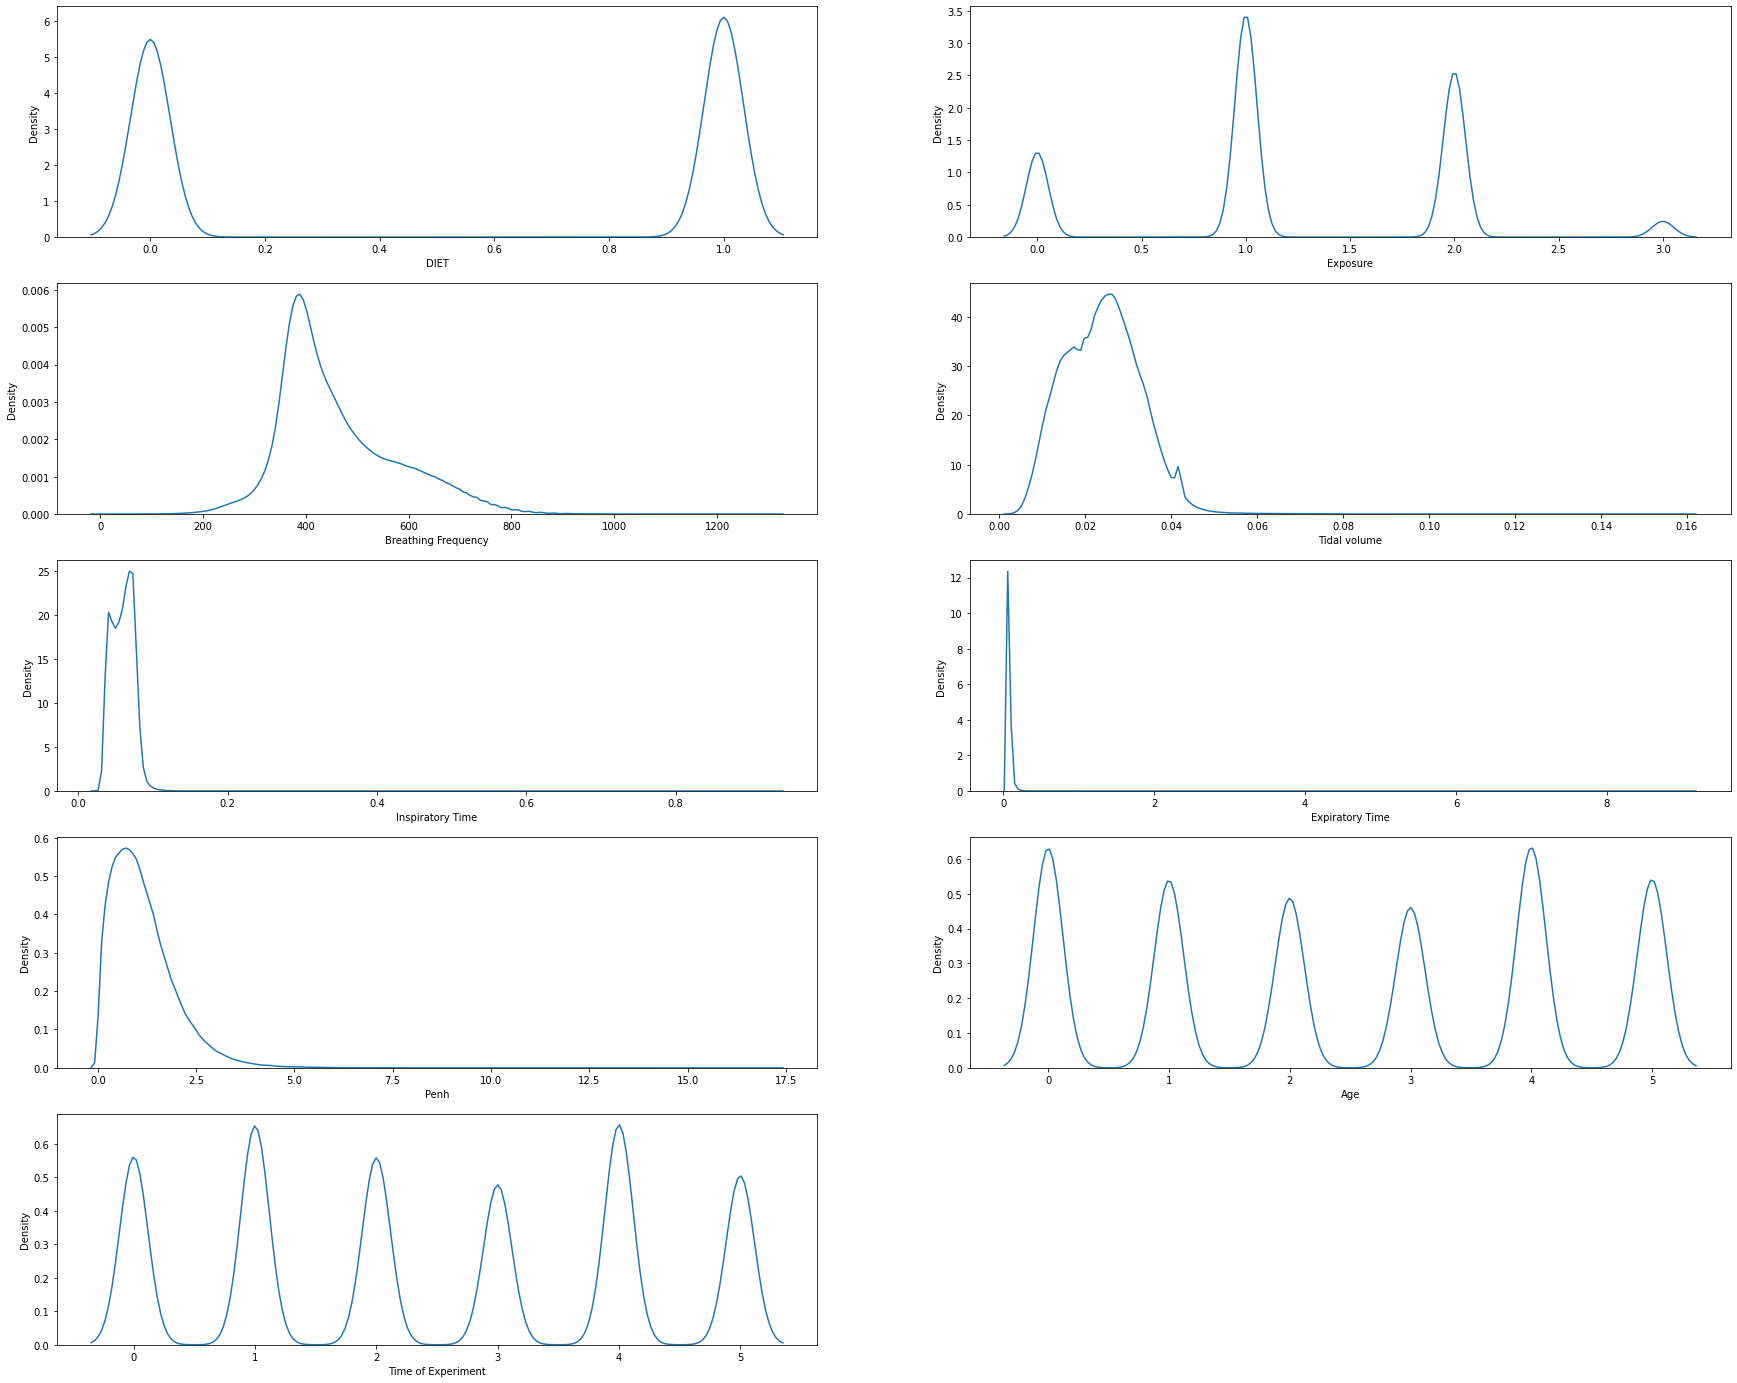

In [ ]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

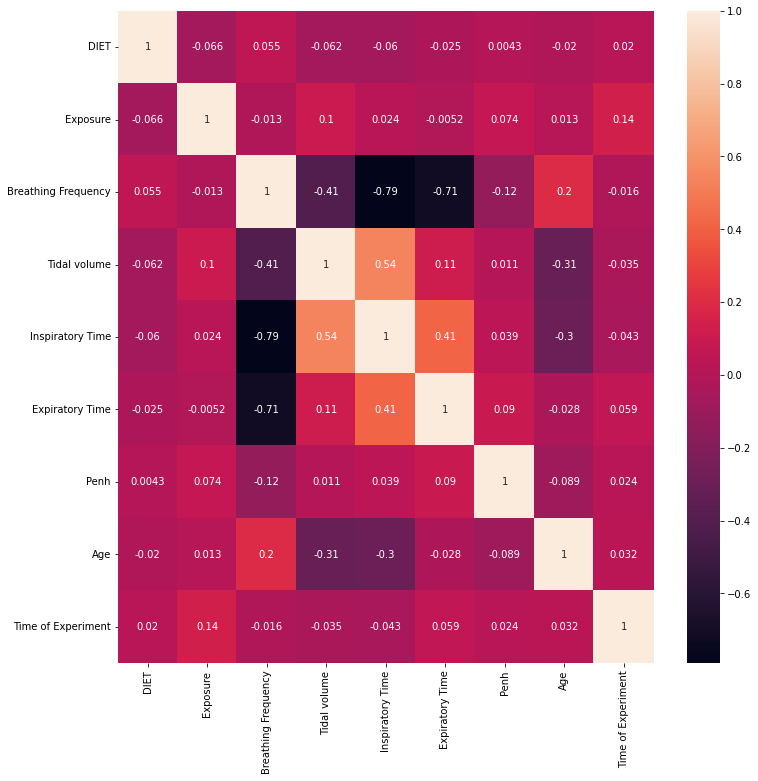

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
### Scaling the dataset

scaled_df = scalar.fit_transform(df)

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-3.321210,0.092165
1,-2.203200,0.785685
2,-3.591863,-0.014070
3,-4.137006,-0.315650
4,-3.227310,-0.178237
...,...,...
646754,1.488670,1.048156
646755,1.538543,1.179116
646756,0.678841,0.443480
646757,-0.002853,0.822532


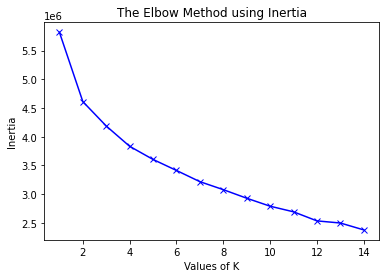

In [ ]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:

kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

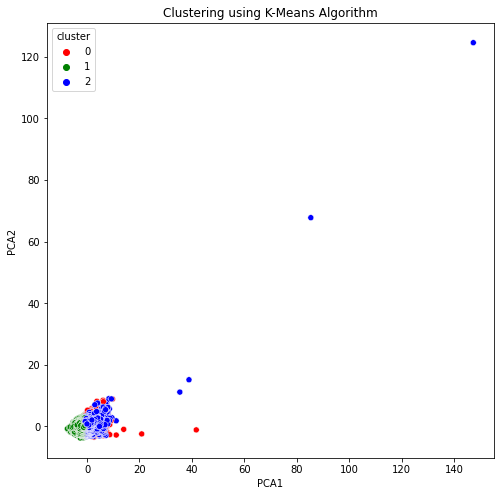

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,DIET,Exposure,Breathing Frequency,Tidal volume,Inspiratory Time,Expiratory Time,Penh,Age,Time of Experiment
0,0.000009,1.305765,397.868981,0.027840,0.067002,0.087351,1.212026,2.117464,2.422382
1,0.572322,1.175937,588.489041,0.016867,0.043493,0.061076,0.972438,3.377215,2.514716
2,1.000000,1.204364,400.303561,0.027185,0.066266,0.087638,1.258857,1.968736,2.411986


In [ ]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,DIET,Exposure,Breathing Frequency,Tidal volume,Inspiratory Time,Expiratory Time,Penh,Age,Time of Experiment,Cluster
0,0,2,666.666667,0.008245,0.036,0.054,0.220027,5,0,1
1,0,2,508.474576,0.007422,0.034,0.084,0.301405,5,0,1
2,0,2,697.674419,0.008343,0.034,0.052,0.060990,5,0,1
3,0,2,789.473684,0.009542,0.034,0.042,0.066129,5,0,1
4,0,2,681.818182,0.010990,0.040,0.048,0.074712,5,0,1
...,...,...,...,...,...,...,...,...,...,...
646754,1,2,384.615385,0.034555,0.070,0.086,1.984075,2,5,2
646755,1,2,379.746835,0.034915,0.068,0.090,2.212418,2,5,2
646756,1,2,468.750000,0.034461,0.072,0.056,1.761263,2,5,2
646757,1,2,500.000000,0.031313,0.058,0.062,2.202002,2,5,2


In [ ]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,DIET,Exposure,Breathing Frequency,Tidal volume,Inspiratory Time,Expiratory Time,Penh,Age,Time of Experiment,Cluster
0,0,2,666.666667,0.008245,0.036,0.054,0.220027,5,0,1
1,0,2,508.474576,0.007422,0.034,0.084,0.301405,5,0,1
2,0,2,697.674419,0.008343,0.034,0.052,0.060990,5,0,1
3,0,2,789.473684,0.009542,0.034,0.042,0.066129,5,0,1
4,0,2,681.818182,0.010990,0.040,0.048,0.074712,5,0,1
...,...,...,...,...,...,...,...,...,...,...
646754,1,2,384.615385,0.034555,0.070,0.086,1.984075,2,5,2
646755,1,2,379.746835,0.034915,0.068,0.090,2.212418,2,5,2
646756,1,2,468.750000,0.034461,0.072,0.056,1.761263,2,5,2
646757,1,2,500.000000,0.031313,0.058,0.062,2.202002,2,5,2


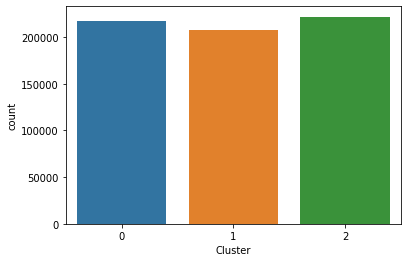

In [ ]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)


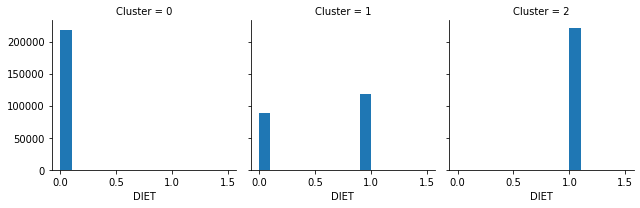

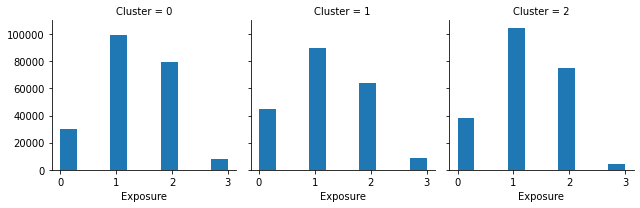

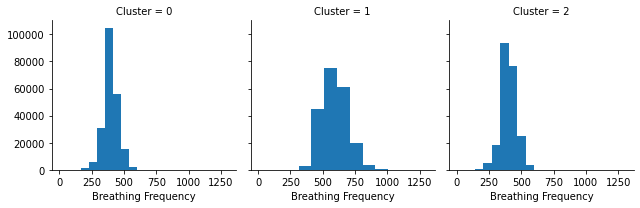

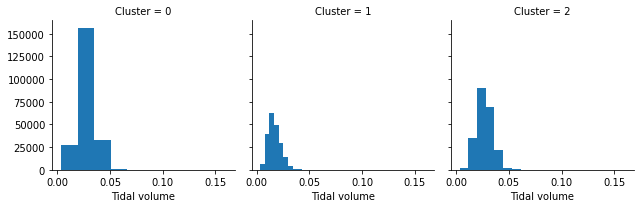

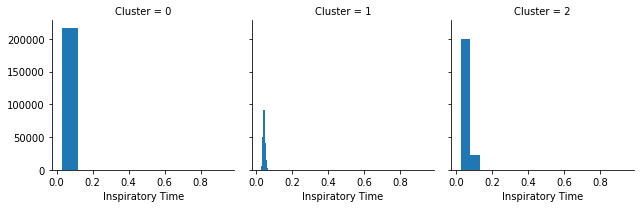

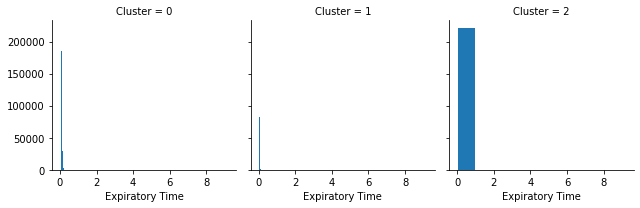

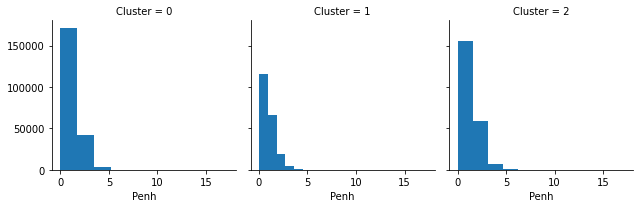

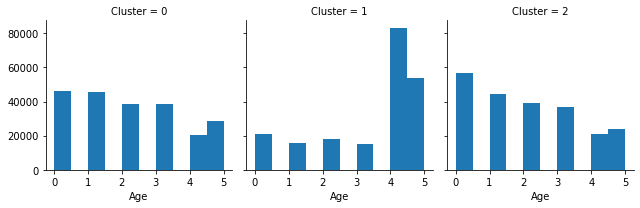

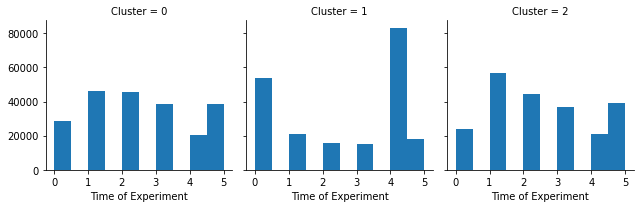

In [ ]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [ ]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [ ]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [ ]:
X_train

,DIET,Exposure,Breathing Frequency,Tidal volume,Inspiratory Time,Expiratory Time,Penh,Age,Time of Experiment
615102,0,2,441.176471,0.031681,0.058,0.078000,1.498827,2,5
278488,1,1,280.373832,0.013012,0.062,0.152000,0.828222,4,4
117037,0,0,666.666667,0.015684,0.038,0.052000,0.373208,5,0
475277,0,1,379.746835,0.019741,0.066,0.092000,6.003759,2,5
212900,0,1,476.190476,0.028203,0.058,0.068000,0.667676,5,0
...,...,...,...,...,...,...,...,...,...
448355,1,0,345.274856,0.014285,0.066,0.107775,3.660486,1,2
184997,0,0,454.545455,0.026598,0.058,0.074000,1.655235,0,1
66285,0,2,526.315790,0.014824,0.042,0.072000,0.685862,4,4
285913,1,0,526.315790,0.018932,0.042,0.072000,0.328340,5,0


In [ ]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64976   543     1]
 [  528 60966   587]
 [    0   564 65863]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     65520
           1       0.98      0.98      0.98     62081
           2       0.99      0.99      0.99     66427

    accuracy                           0.99    194028
   macro avg       0.99      0.99      0.99    194028
weighted avg       0.99      0.99      0.99    194028



In [ ]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9885428907168038 % Acuuracy
